In [1]:
import numpy as np
import sympy as sp
from scipy.integrate import quad
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline


#**Listing 4 PolyFit**


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(5,) (5,)
[ 1.87814025e-02 -6.30663836e-01 -5.11778435e+01]


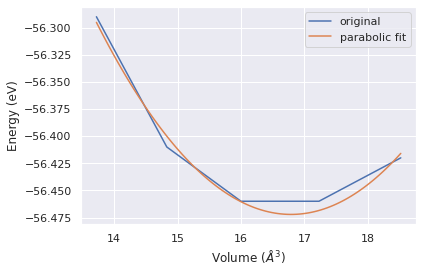

In [2]:
import numpy as np
import matplotlib.pyplot as plt
v = np.array([13.72, 14.83, 16.0, 17.23, 18.52])
e = np.array([-56.29, -56.41, -56.46, -56.46, -56.42])
print (v.shape, e.shape)

### fit a parabola to the data
# y = cx^2 + bx + a
a = np.polyfit(v,e,2)
print(a)
plt.plot(v,e)

#make a vector to evaluate fits on with a lot of points so it looks smooth
vfit = np.linspace(min(v),max(v),100)
plt.plot(vfit, (a[0]*vfit**2 + a[1]*vfit + a[2]))
plt.legend(('original', 'parabolic fit'))
plt.xlabel("Volume ($\AA^3$)")
plt.ylabel("Energy (eV)")
plt.savefig('eos.eps')
plt.show()

#**Listing 5 Integration** 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


14.666666666666668
4*x**3/3 + 2*x


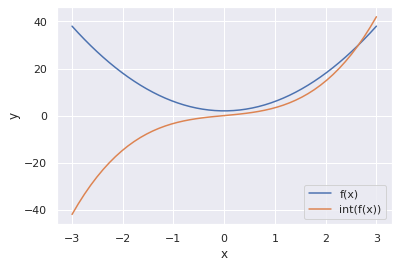

In [3]:
###### Define the function ########
def func(x):
    return 4*x**2 +2

###### Definite integration #######
def int_func(a, b):
    I= quad(func, a , b)
    return I[0]

print(int_func(0, 2))

###### Symbolic integration #######
def int(x):
    x = sp.symbols('x')
    val =sp.integrate(func(x), x)
    return val

x = sp.symbols("x")
value = int(x)
print (value)

######## Plotting done here ########
x = sp.symbols('x')
intx=[]

for i in np.linspace(-3,3):
    intx.append(int(x).evalf(subs={x: i}))

x = np.linspace(-3,3)
plt.plot(x,func(x))
plt.plot(x,intx)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(('f(x)', 'int(f(x))' ))
plt.savefig('int.eps')
plt.show()


#**Listing 6 Optimisation**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[2.54283432 1.14322966 0.37783414] [[ 0.01367     0.00416405 -0.00116598]
 [ 0.00416405  0.01517635  0.00590274]
 [-0.00116598  0.00590274  0.00376727]]


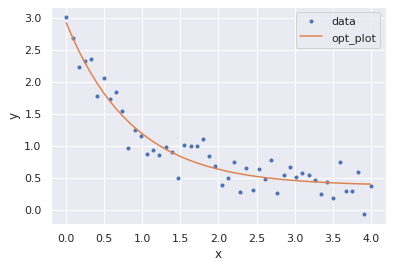

In [4]:
import scipy.optimize as opt

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

#Optimisation Begins
plt.plot(xdata, ydata, ".", label="Data");
popt, pcov = opt.curve_fit(func, xdata, ydata);
print (popt, pcov)

# Use the optimized parameters to plot the best fit
plt.plot(xdata, func(xdata, *popt), label="fit");

# Show the graph
plt.xlabel("x")
plt.ylabel("y")
plt.legend(('data', 'opt_plot' ))
plt.savefig('opt.eps')
plt.show();

#**Listing 7 Reading Data Files**

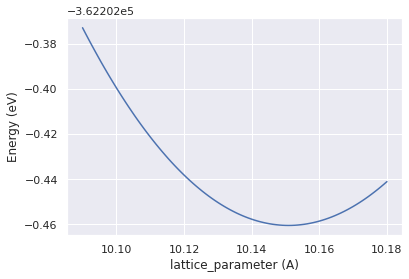

In [5]:
file= open('lat.dat', 'r')
mod_file= open('modlat.dat','w')
data=[]

#line.split() splits the entire line and returns a list of words contained in the line
#Then we apply map function to convert all the values into float (since they are energy, volume values)
#Then we convert one training example pair of (V,E) and add them to a list
#Then we add those values to a new data file called mod_dat!
while True:
    line= file.readline()

    if line:
        data.append(list(map(float, line.split()[0:])))

    if not line:
        break

for i in range(len(data)):
    mod_file.write('%6.6f %6.6f \n'%(data[i][0], data[i][1]))

x,y  = np.loadtxt('lat.dat', unpack=True)

####
plt.xlabel("lattice_parameter (A)")
plt.ylabel("Energy (eV)")
plt.plot(x,y, label='Loaded from file!')
plt.show()

#**A3) Question 1**

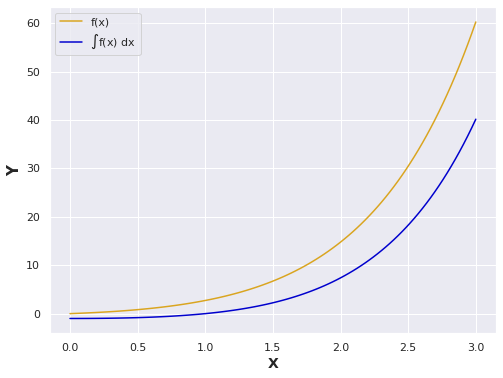

In [6]:
#Q1 Begins
#For calculating the symbolic integral
def func(x):
    return x*sp.exp(x)

#For actually calculating value of the function
def func_value(x):
    return x*np.exp(x)

def symbolic_integral(x):
    x= sp.symbols('x')
    integral= sp.integrate(func(x), x)
    return integral

x= sp.symbols('x')
integral= symbolic_integral(x)
integral_values=[]

#To calculate the values of the integral
for i in np.linspace(0,3,100):
    integral_values.append(symbolic_integral(x).evalf(subs={x:i}))

x= np.linspace(0,3,100)

plt.subplots(figsize=(8,6))
plt.plot(x, func_value(x), color='goldenrod')
plt.plot(x, integral_values, color='mediumblue')
plt.xlabel('X', fontweight='bold', size=14)
plt.ylabel('Y', fontweight='bold', size=15)
plt.legend(['f(x)', '$\int$f(x) dx'])
plt.show()

#**Q2) Part (A)**

In [7]:
#Open original file
file= open('lat.dat', 'r')

#Open a new file to write into
mod_file= open('mod_lat.dat','w')
data=[]

#line.split() splits the entire line and returns a list of words contained in the line
#Then we apply map function to convert all the values into float (since they are energy, volume values)
#Then we convert one training example pair of (V,E) and add them to a list
#Then we add those values to a new data file called mod_dat!
while True:
    line= file.readline()
    if line:
        data.append(list(map(float, line.split()[0:])))
    if not line:
        break
file.close()

for i in range(len(data)):
    mod_file.write('%6.6f %6.6f \n'%((data[i][0])**3, data[i][1]))
mod_file.close()

V,E  = np.loadtxt('mod_lat.dat', unpack=True)

#**Q2) Part (B)**

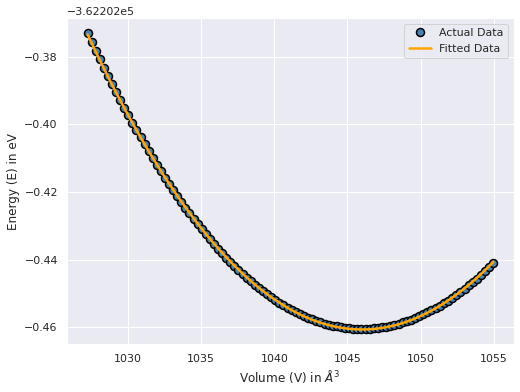

In [8]:
#Polynomial Fitting begins
coefs= np.polyfit(V,E, 2)
a,b,c=coefs

V0= -b/(2*a)
E0=  a*(V0**2) +b*V0 + c
B0= 2*a*V0
B0_prime= 4

plt.subplots(figsize=(8,6))
plt.plot(V,E, 'o', mec='black',mew=1.5, ms=8, color='steelblue')

#Plotting the Parabolic E vs V curve
v_fit= np.linspace(min(V), max(V),100)
plt.plot(v_fit, a*(v_fit**2) + b*v_fit + c, color='orange', lw=2.5)

plt.xlabel('Volume (V) in ${\AA}^3$ ')
plt.ylabel('Energy (E) in eV')
plt.legend(['Actual Data', 'Fitted Data'])
plt.show()

In [9]:
print("Estimated Values of:")
print("B0 = %f"%B0)
print("B0_prime = %f"%B0_prime)
print("V0 = %f"%V0)
print("E0 = %f"%E0)

Estimated Values of:
B0 = 0.518921
B0_prime = 4.000000
V0 = 1045.998215
E0 = -362202.460635


#**Q2) Part (C)**
$E(V) = E_0 + \frac{9V_0B_0}{16} \{[(\frac{V_0}{V})^\frac{2}{3}-1]^3 B'_0 + [(\frac{V_0}{V})^\frac{2}{3}-1]^2[6-4(\frac{V_0}{V})^\frac{2}{3}]\}$

Optimsed Values of:
E0 = -362202.460450
V0 = 1045.960388
B0 = 0.506840
B0_prime = 4.056808


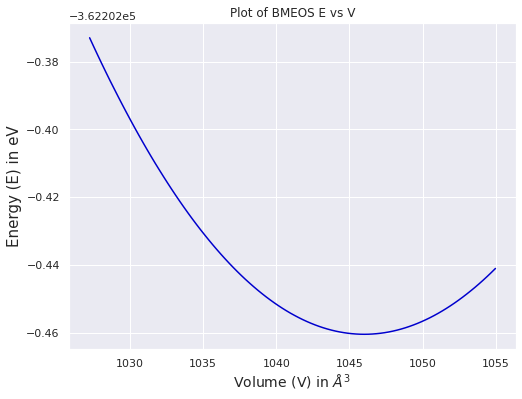

In [10]:
import scipy.optimize as opt

def BM_EOS(V, E0, V0, B0, B0_prime):
    a= (V0/V)**(2/3) - 1
    E= E0 + 9/16*V0*B0*(a**3*B0_prime + (a**2)*(6-4*(a+1)))
    return E

#Using Optimiser to get more accurate values of parameters
#For proper curve fit, using initial guess from parabolic fit
popt, pcov= opt.curve_fit(BM_EOS,V,E, p0=[E0,V0,B0,B0_prime])

E_opt= BM_EOS(V,*popt)

print("Optimsed Values of:")
print("E0 = %f"%popt[0])
print("V0 = %f"%popt[1])
print("B0 = %f"%popt[2])
print("B0_prime = %f"%popt[3])

#Plotting the actual function
v_opt= np.linspace(min(V), max(V), 100)

plt.subplots(figsize=(8,6))
plt.plot(v_opt, E_opt, color='mediumblue')
plt.xlabel('Volume (V) in ${\AA}^3$', size=14)
plt.ylabel('Energy (E) in eV', size=15)
plt.title('Plot of BMEOS E vs V')
plt.show()